In [201]:
b_display_histograms = True
b_display_confusion_matrix = True
b_display_roc_curve = True

### Required packages:

| Package name | Install command |
|--------------|-----------------|
| imbalanced-learn | pip install -U imbalanced-learn |
| scikit-learn | pip install -U scikit-learn |
| seaborn | pip install -U seaborn |

In [202]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from colorama import Fore, Style
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Displays all columns
pd.set_option('display.max_columns', 35)

### Dataset columns description

| Column name | Data description |
|--------------|-----------------|
| ID | Unique ID of the representative |
| Loan Amount | Loan amount applied |
| Funded Amount | Loan amount funded |
| Funded Amount Investor | Loan amount approved by the investors |
| Term | Term of loan (in months) |
| Batch Enrolled | Batch numbers assigned to the representatives |
| Interest Rate | Interest rate (%) on loan |
| Grade | Grade given by the bank |
| Sub Grade | Sub-grade given by the bank |
| Employment Duration | Duration |
| Home Ownership | Ownership of home |
| Verification Status | Income verification by the bank |
| Payment Plan | If any payment plan has started against loan |
| Loan Title | Loan title provided |
| Debit to Income | Ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage |
| Delinquency - two years | Number of 30+ days delinquency in past 2 years |
| Inquires - six months | Total number of inquiries in last 6 months |
| Open Account | Number of open credit line in representative's credit line |
| Public Record | Number of derogatory public records |
| Revolving Balance | Total credit revolving balance |
| Revolving Utilities | Amount of credit a representative is using relative to revolving_balance |
| Total Accounts | Total number of credit lines available in representatives credit line |
| Initial List Status | Unique listing status of the loan - W(Waiting), F(Forwarded) |
| Total Received Interest | Total interest received till date |
| Total Received Late Fee | Total late fee received till date |
| Recoveries | Post charge off gross recovery |
| Collection Recovery Fee | Post charge off collection fee |
| Collection 12 months Medical | Total collections in last 12 months excluding medical collections |
| Application Type | Indicates when the representative is an individual or joint |
| Last week Pay | Indicates how long (in weeks) a representative has paid EMI after batch enrolled |
| Accounts Delinquent | Number of accounts on which the representative is delinquent |
| Total Collection Amount | Total collection amount |
| Total Current Balance | Total current balance from all accounts |
| Total Revolving Credit Limit | Total revolving credit limit |
| Loan Status | 1 = Defaulter, 0 = Non Defaulters |

In [203]:
# Read data file
df = pd.read_csv('train.csv')
# Rename columns
df.columns = ['id', 'loan_amount', 'funded_amount', 'funded_amount_investor', 'term', 'batch_enrolled', 'interest_rate', 'grade', 'sub_grade', 'employment_duration', 'home_ownership', 'verification_status', 'payment_plan', 'loan_title', 'debit_to_income', 'delinquency_two_years', 'inquires', 'open_account', 'public_record', 'revolving_balance', 'revolving_utilities', 'total_accounts', 'initial_list_status', 'total_received_interest', 'total_received_late_fee', 'recoveries', 'collection_recovery_fee', 'collection_12_months_medical', 'application_type', 'last_week_pay', 'accounts_delinquent', 'total_collection_amount', 'total_current_balance', 'total_revolving_credit_limit', 'loan_status']
# Display data
display(df)

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,employment_duration,home_ownership,verification_status,payment_plan,loan_title,debit_to_income,delinquency_two_years,inquires,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


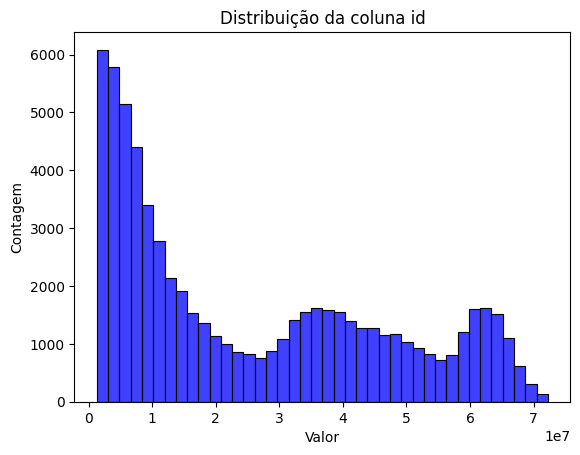

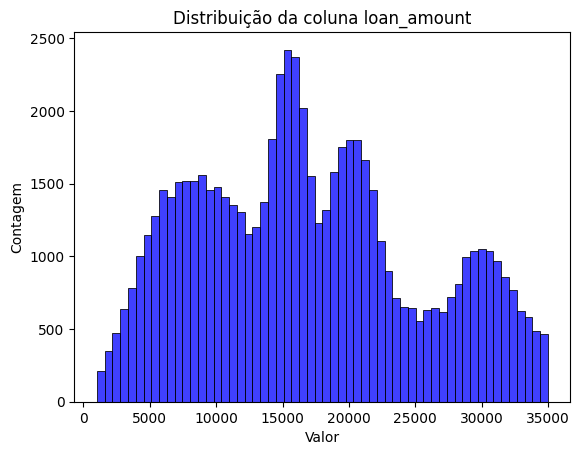

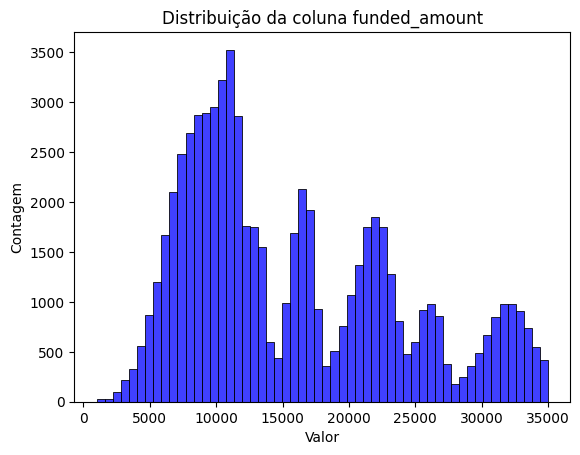

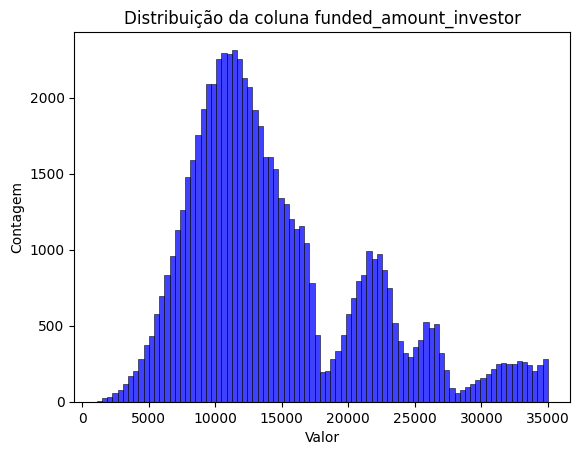

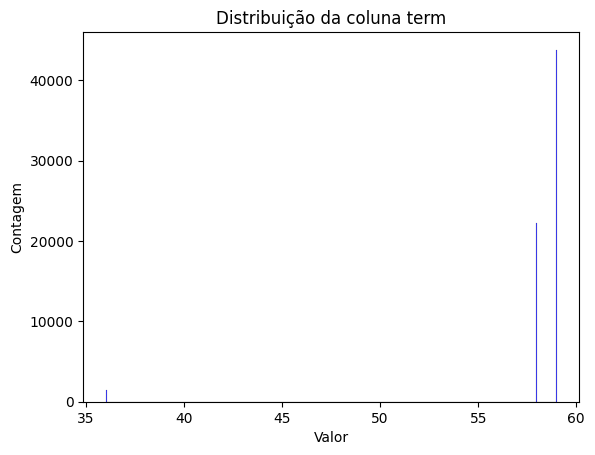

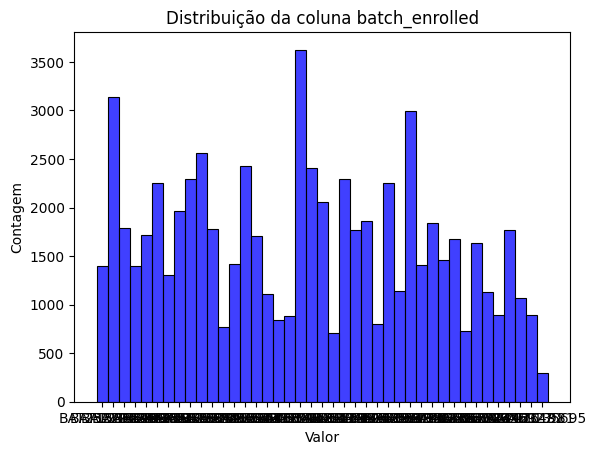

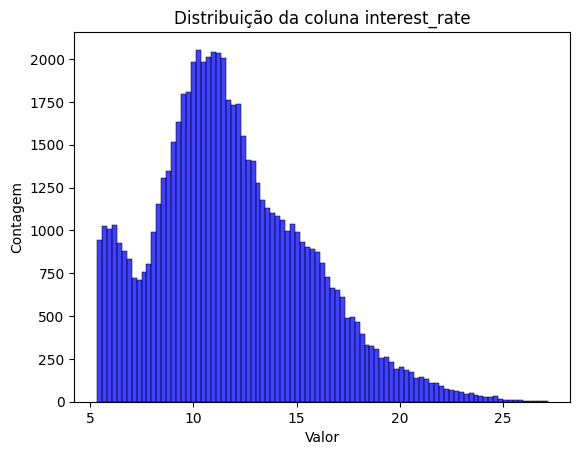

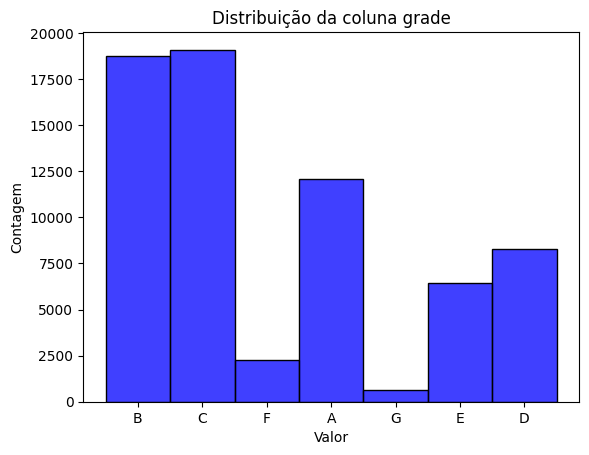

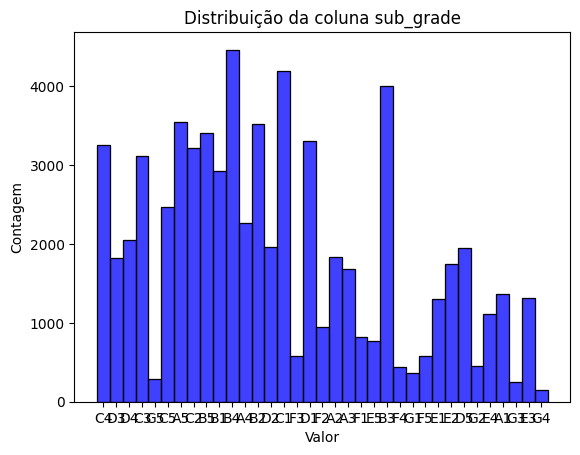

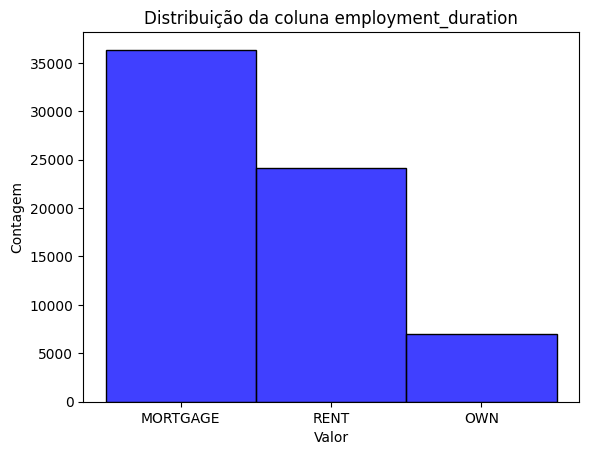

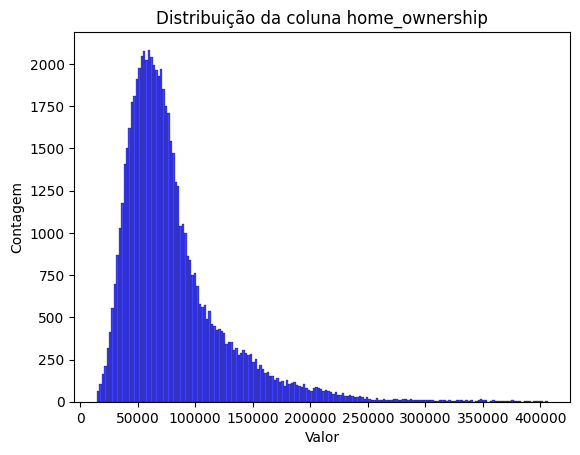

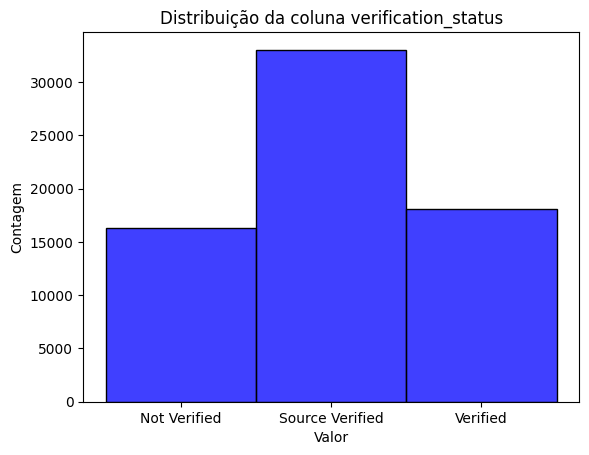

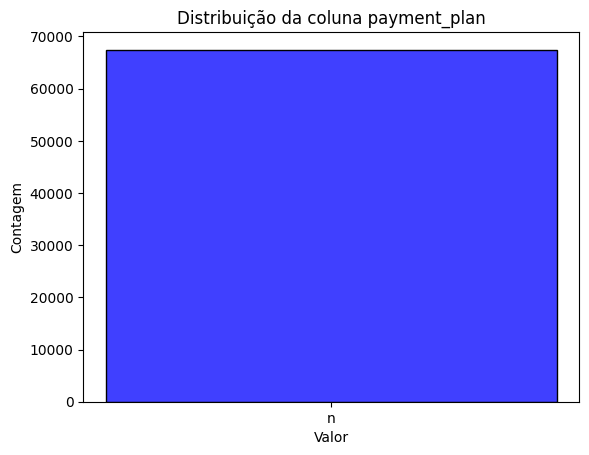

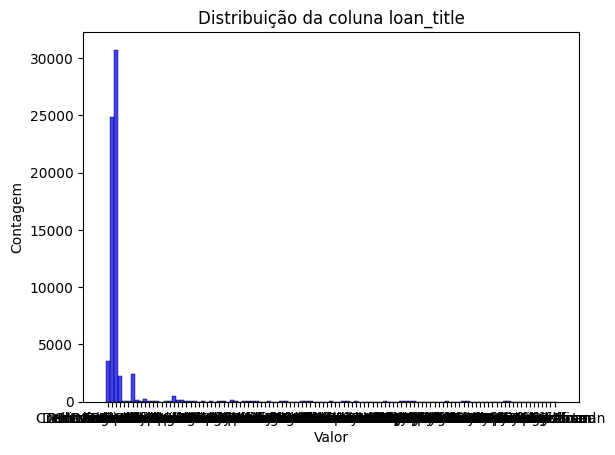

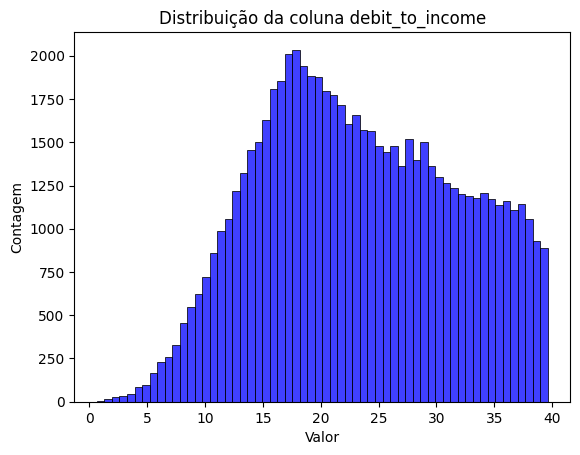

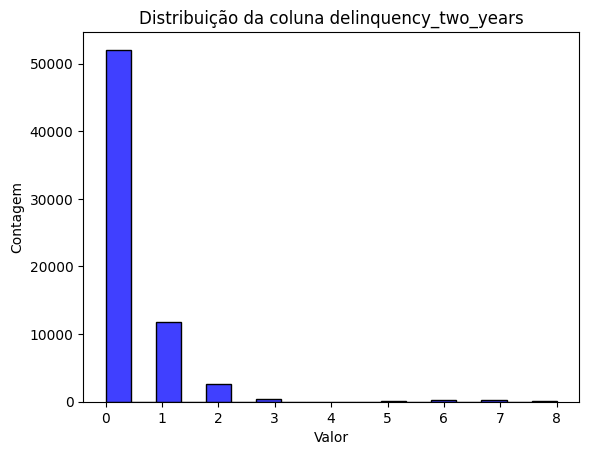

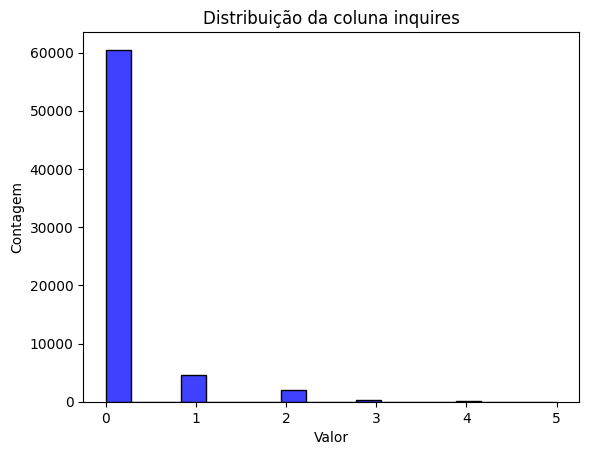

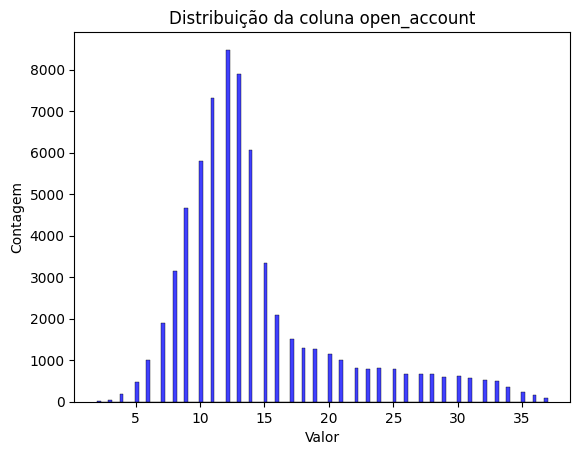

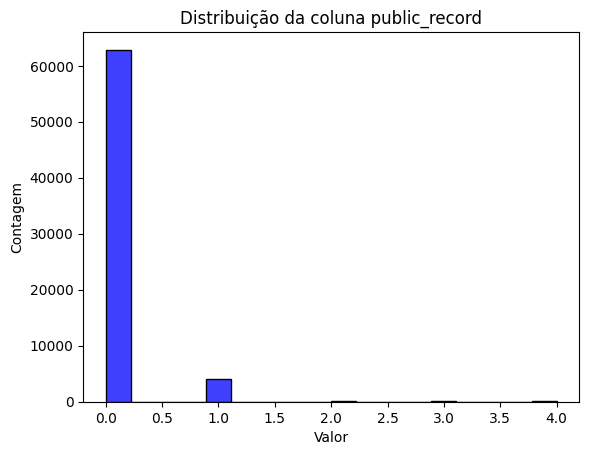

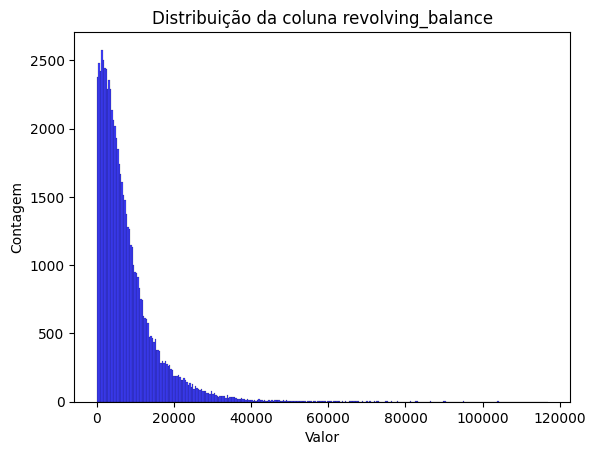

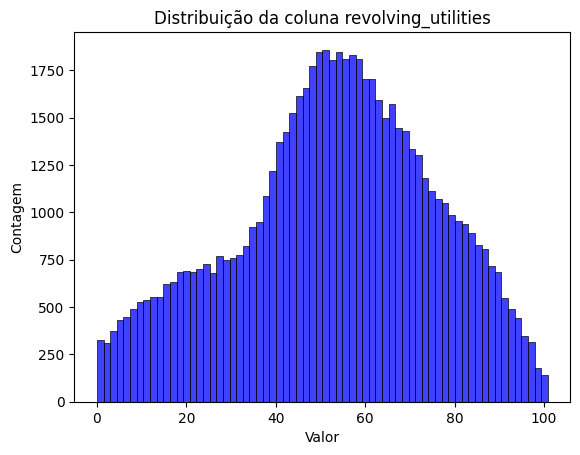

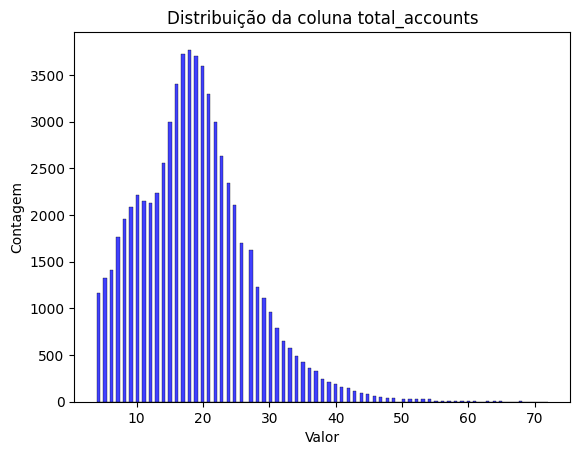

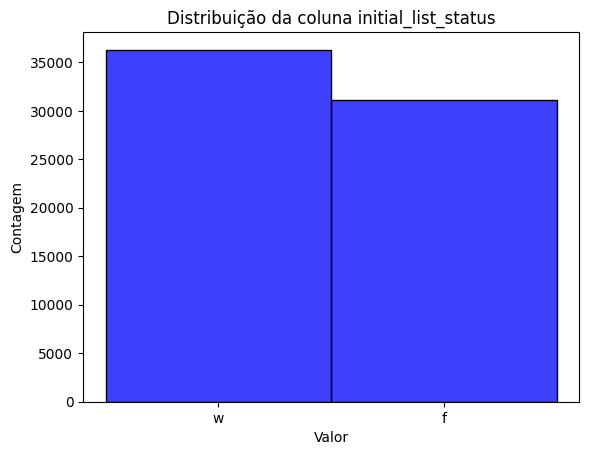

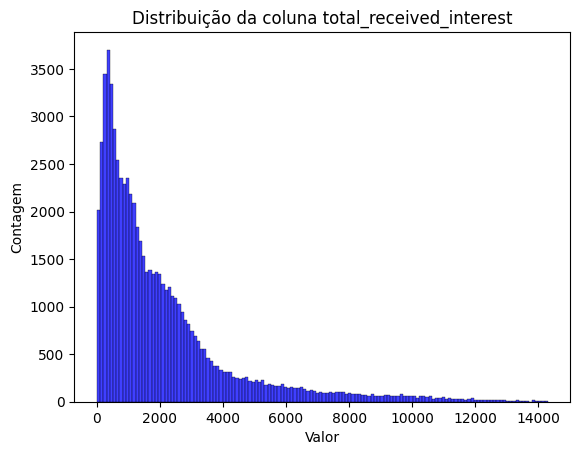

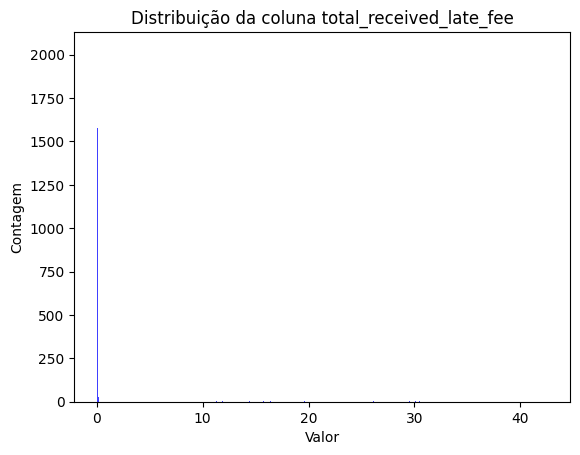

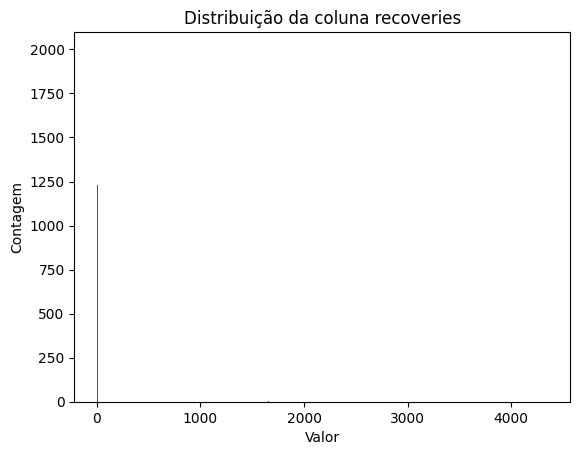

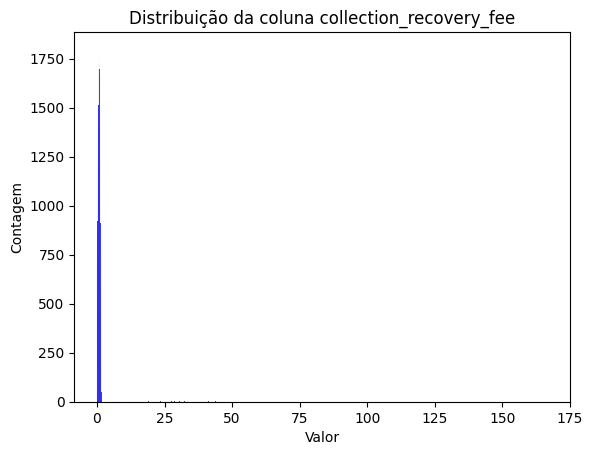

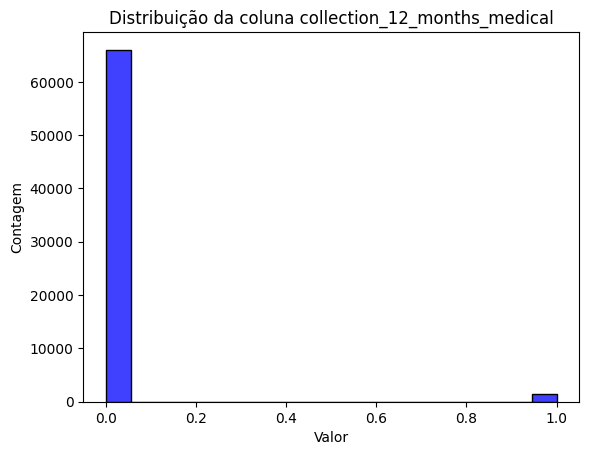

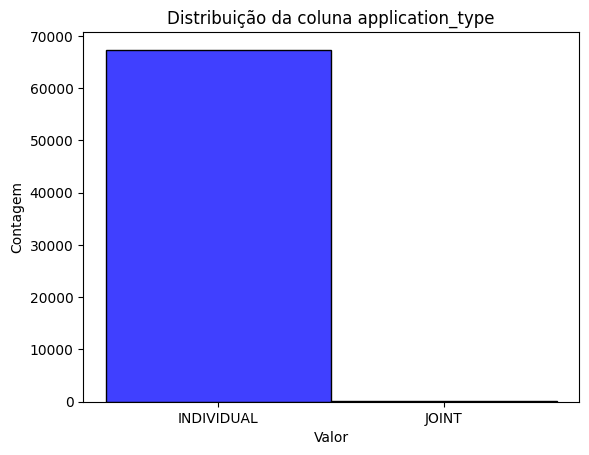

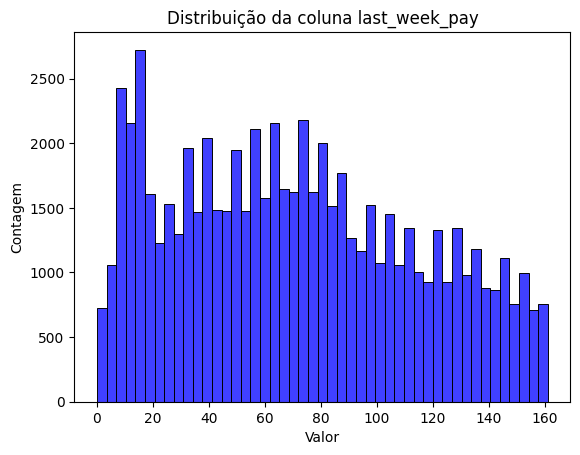

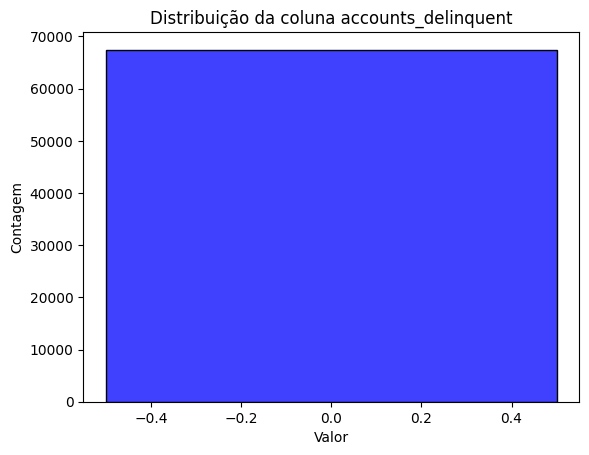

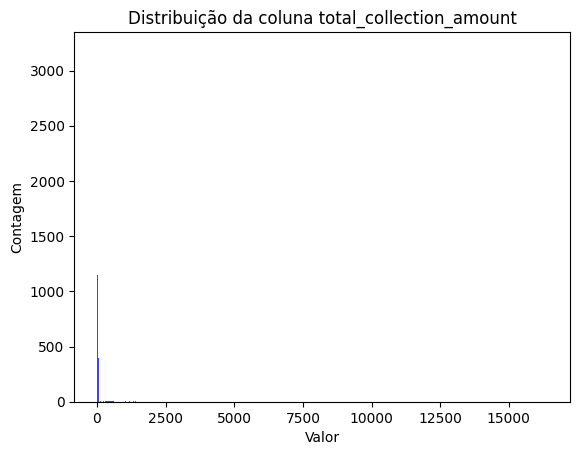

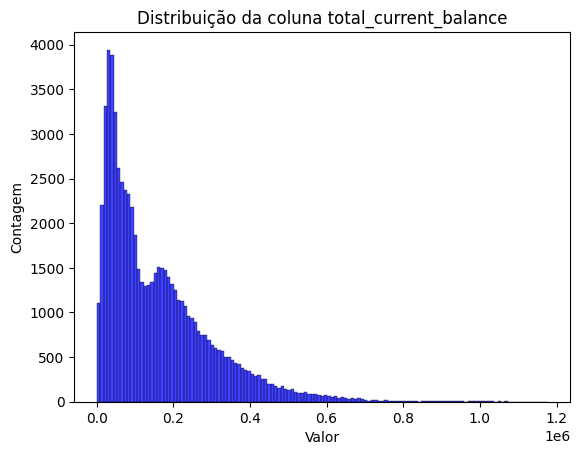

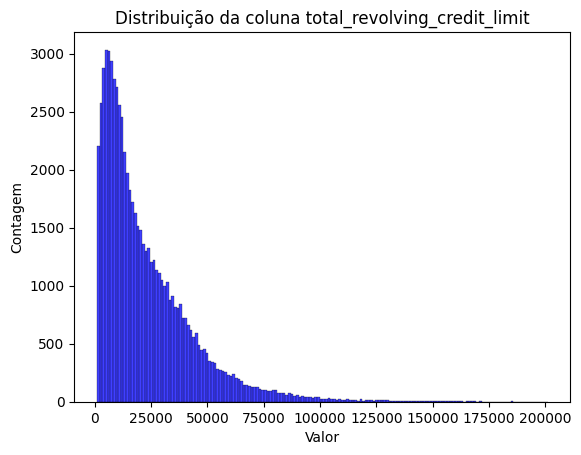

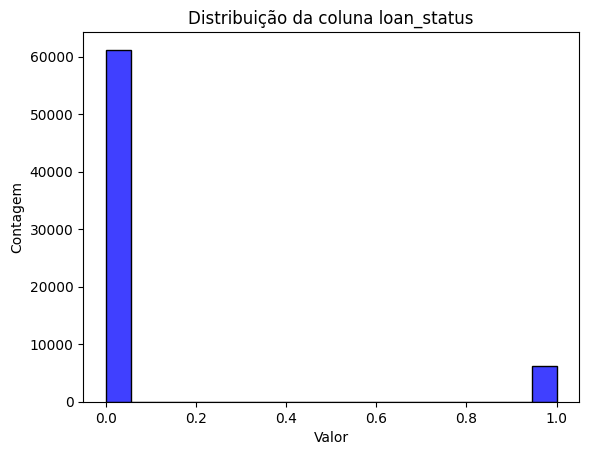

In [204]:
# Plot histograms
if b_display_histograms:
    for column in df.columns:
        plt.figure()
        sns.histplot(df[column], color='blue')
        plt.title(f'Distribuição da coluna {column}')
        plt.xlabel('Valor')
        plt.ylabel('Contagem')
        plt.show()

In [205]:
# Descriptive data
df.describe()

,id,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [206]:
# Get the number of unique values per column
for column_name in df.columns:
    unique_values = df[column_name].nunique()

    if unique_values == 1:
        print(Fore.RED + f'The column "{column_name}" has {str(unique_values)} unique values.' + Style.RESET_ALL)
    else:
        print(f'The column "{column_name}" has {str(unique_values)} unique values.')

The column "id" has 67463 unique values.
The column "loan_amount" has 27525 unique values.
The column "funded_amount" has 24548 unique values.
The column "funded_amount_investor" has 67441 unique values.
The column "term" has 3 unique values.
The column "batch_enrolled" has 41 unique values.
The column "interest_rate" has 67448 unique values.
The column "grade" has 7 unique values.
The column "sub_grade" has 35 unique values.
The column "employment_duration" has 3 unique values.
The column "home_ownership" has 67454 unique values.
The column "verification_status" has 3 unique values.
The column "payment_plan" has 1 unique values.
The column "loan_title" has 109 unique values.
The column "debit_to_income" has 67454 unique values.
The column "delinquency_two_years" has 9 unique values.
The column "inquires" has 6 unique values.
The column "open_account" has 36 unique values.
The column "public_record" has 5 unique values.
The column "revolving_balance" has 20582 unique values.
The column

#### Variables to drop

* ID - Doesn't offer any value in the context of the domain
* Payment Plan & Accounts Delinquent - Only 1 unique value across the whole dataset

In [207]:
# Variables to drop:
df.drop(columns=['id', 'payment_plan', 'accounts_delinquent'], inplace=True)

# Create a list for all relevant columns
selected_columns = []

In [208]:
# ANOVA - numeric values
print('Relevant columns according to ANOVA:\n')

for col in df.select_dtypes(include=['number']).columns.tolist():
    if col != 'loan_status':
        stat, p = ttest_ind(df[df['loan_status'] == 0][col], df[df['loan_status'] == 1][col])
        if p < 0.05: # Considering a significance level of 0.05
            print(f"{col} (p-value = {p})")
            selected_columns.append(col)

Relevant columns according to ANOVA:

delinquency_two_years (p-value = 0.009462634922902892)
public_record (p-value = 0.00594638649379683)
total_received_late_fee (p-value = 0.014999219404475453)
total_collection_amount (p-value = 0.040370450673417616)
total_current_balance (p-value = 0.010689900265561244)


In [209]:
# Chi-Square - objects
print('Relevant columns according to Chi-Square:\n')

for col in df.select_dtypes(include=['object']).columns.tolist():
    contingency_table = pd.crosstab(df[col], df['loan_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05: # Considering a significance level of 0.05
        print(f"{col} (p-value = {p})")
        selected_columns.append(col)

Relevant columns according to Chi-Square:

grade (p-value = 0.029360514462449295)
employment_duration (p-value = 0.00031884941471389697)
initial_list_status (p-value = 0.0005038281525924869)


In [210]:
# Select only the prefered columns
df_selected = df[selected_columns].copy()

# Display only the selected columns
display(df_selected)

# Create dummies of the categorical columns
df_selected = pd.get_dummies(df_selected, dtype=float)

# Display the selected columns after adding dummies and converting them to numeric variables
display(df_selected)

,delinquency_two_years,public_record,total_received_late_fee,total_collection_amount,total_current_balance,grade,employment_duration,initial_list_status
0,1,0,0.102055,31,311301,B,MORTGAGE,w
1,0,0,0.036181,53,182610,C,RENT,f
2,0,0,18.778660,34,89801,F,MORTGAGE,w
3,1,0,0.044131,40,9189,C,MORTGAGE,w
4,1,1,19.306646,430,126029,C,MORTGAGE,w
...,...,...,...,...,...,...,...,...
67458,1,0,0.023478,48,181775,C,MORTGAGE,w
67459,0,0,0.027095,37,22692,C,RENT,w
67460,0,1,0.028212,17,176857,A,MORTGAGE,w
67461,0,0,0.074508,61,361339,D,OWN,f


,delinquency_two_years,public_record,total_received_late_fee,total_collection_amount,total_current_balance,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,employment_duration_MORTGAGE,employment_duration_OWN,employment_duration_RENT,initial_list_status_f,initial_list_status_w
0,1,0,0.102055,31,311301,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0,0.036181,53,182610,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0,18.778660,34,89801,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,0,0.044131,40,9189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,19.306646,430,126029,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,1,0,0.023478,48,181775,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
67459,0,0,0.027095,37,22692,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
67460,0,1,0.028212,17,176857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
67461,0,0,0.074508,61,361339,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [211]:
# Create the test and training sets of data
x_train, x_test, y_train, y_test = train_test_split(df_selected, df['loan_status'], train_size=0.7, random_state=88)

# Before over-sampling and standardization
display(x_train)

# Over-sampling
smote = SMOTE(random_state=88)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Standardize values
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# After over-sampling and standardization
display(x_train)

,delinquency_two_years,public_record,total_received_late_fee,total_collection_amount,total_current_balance,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,employment_duration_MORTGAGE,employment_duration_OWN,employment_duration_RENT,initial_list_status_f,initial_list_status_w
9590,0,0,0.123842,20,69599,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
26457,0,0,0.097571,47,317098,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
61445,0,0,0.024619,1563,77853,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
55049,0,0,0.015075,51,256065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
27375,0,0,0.074254,39,269927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40801,0,0,0.020329,1528,93874,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
62053,5,0,0.023408,50,259680,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56212,0,0,0.042779,526,69121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2481,1,0,0.015602,39,52351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


array([[-0.35126074, -0.18736031, -0.21998012, ...,  1.43153454,
        -1.02099307,  1.02099307],
       [-0.35126074, -0.18736031, -0.22526894, ...,  1.43153454,
         1.15157278, -1.15157278],
       [-0.35126074, -0.18736031, -0.2399555 , ..., -0.82395233,
         1.15157278, -1.15157278],
       ...,
       [-0.35126074, -0.18736031, -0.22539193, ..., -0.82395233,
         1.15157278, -1.15157278],
       [-0.35126074, -0.18736031, -0.23623854, ..., -0.82395233,
        -1.02099307,  1.02099307],
       [-0.35126074, -0.18736031, -0.23562586, ..., -0.82395233,
        -1.02099307,  1.02099307]])

In [212]:
def execute_model(model):

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_prediction = model.predict(x_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_prediction)
    print(f"Accuracy: {accuracy}\n")

    # Make a report based on the predictions
    report = classification_report(y_test, y_prediction, zero_division=1)
    print(report)

    if b_display_confusion_matrix:
        # Calculate the confusion matrix
        c_matrix = confusion_matrix(y_test, y_prediction)
        
        # Plot an histogram with the values from the confusion matrix
        plt.figure(figsize=(3, 3))
        sns.heatmap(c_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
        plt.xlabel('Predicted values')
        plt.ylabel('Actual values')
        plt.title('Confusion Matrix')
        plt.show()

    if b_display_roc_curve:
        # Predict probability
        probs = model.predict_proba(x_test)[:, 1]

        # Generate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        roc_auc = roc_auc_score(y_test, probs)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

# Logistic Regression

Accuracy: 0.39171895844656357

              precision    recall  f1-score   support

           0       0.91      0.37      0.52     18393
           1       0.09      0.64      0.16      1846

    accuracy                           0.39     20239
   macro avg       0.50      0.51      0.34     20239
weighted avg       0.84      0.39      0.49     20239



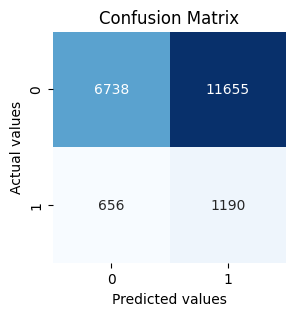

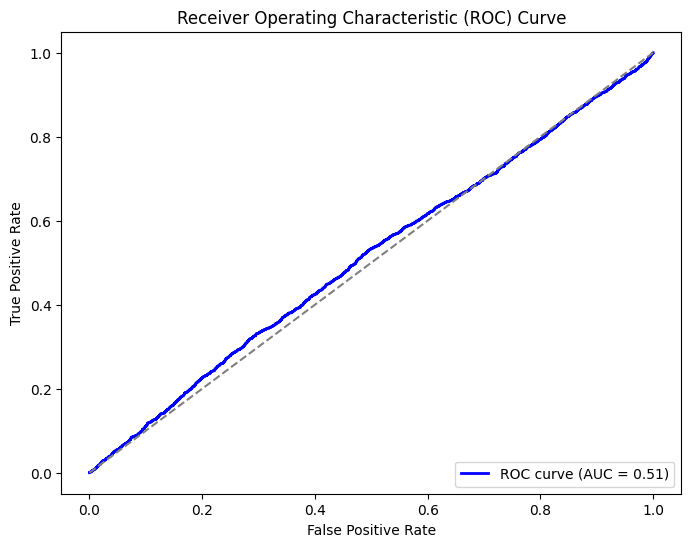

In [213]:
execute_model(LogisticRegression(class_weight='balanced'))

# Naive Bayes

Accuracy: 0.3694352487771135

              precision    recall  f1-score   support

           0       0.90      0.34      0.50     18393
           1       0.09      0.63      0.15      1846

    accuracy                           0.37     20239
   macro avg       0.50      0.49      0.33     20239
weighted avg       0.83      0.37      0.47     20239



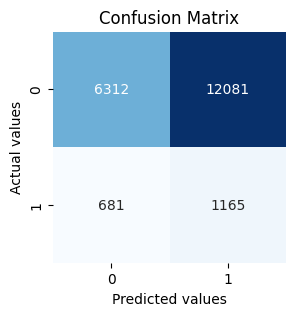

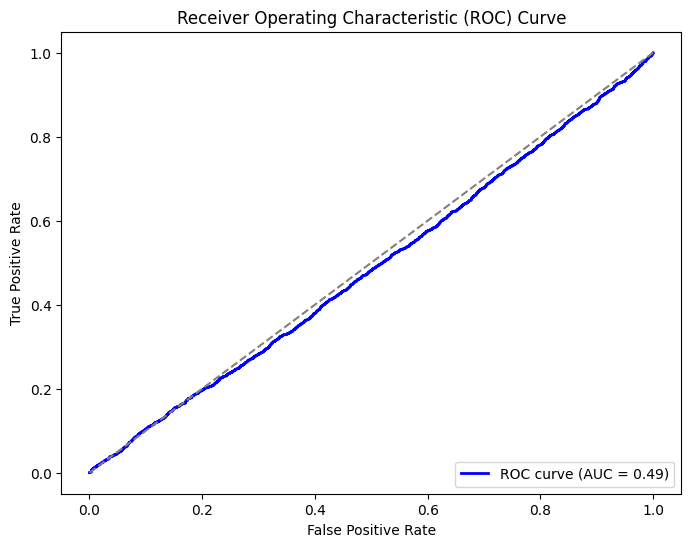

In [214]:
execute_model(GaussianNB())

# Decision Tree Classifier

Accuracy: 0.8179257868471762

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     18393
           1       0.09      0.11      0.10      1846

    accuracy                           0.82     20239
   macro avg       0.50      0.50      0.50     20239
weighted avg       0.83      0.82      0.83     20239



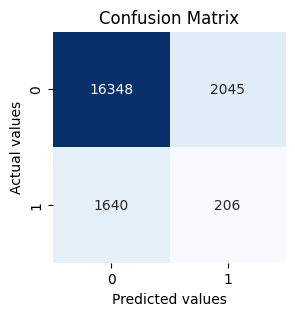

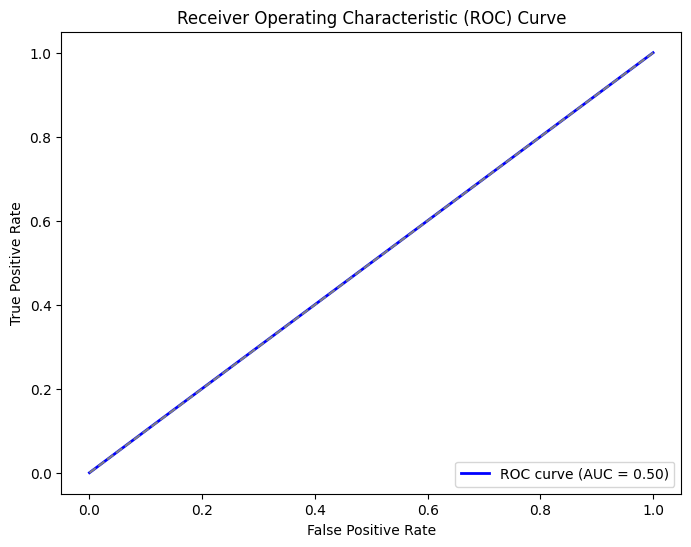

In [215]:
execute_model(DecisionTreeClassifier())

# k-Nearest Neighbors (KNN)

Accuracy: 0.8619002915163793

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     18393
           1       0.09      0.06      0.07      1846

    accuracy                           0.86     20239
   macro avg       0.50      0.50      0.50     20239
weighted avg       0.83      0.86      0.85     20239



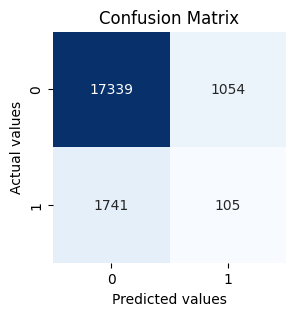

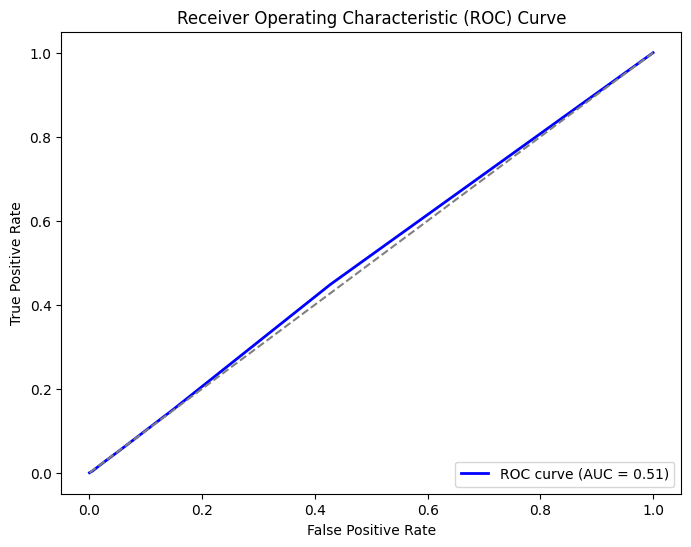

In [216]:
execute_model(KNeighborsClassifier(n_neighbors=5))

# Random Forest Classifier

Accuracy: 0.9021196699441673

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18393
           1       0.13      0.01      0.02      1846

    accuracy                           0.90     20239
   macro avg       0.52      0.50      0.49     20239
weighted avg       0.84      0.90      0.86     20239



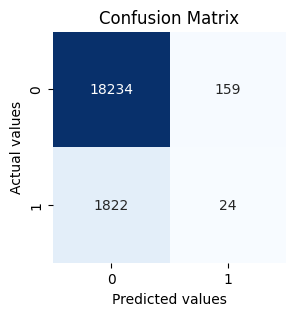

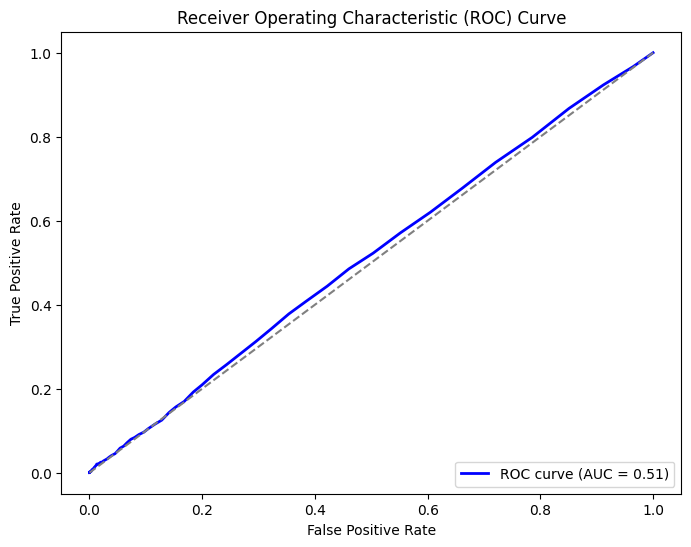

In [217]:
execute_model(RandomForestClassifier(n_estimators=100, random_state=88))

# Support Vector Machines (SVM)

Accuracy: 0.2674045160334009

              precision    recall  f1-score   support

           0       0.91      0.22      0.35     18393
           1       0.09      0.78      0.16      1846

    accuracy                           0.27     20239
   macro avg       0.50      0.50      0.26     20239
weighted avg       0.83      0.27      0.33     20239



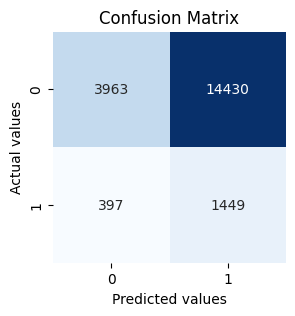

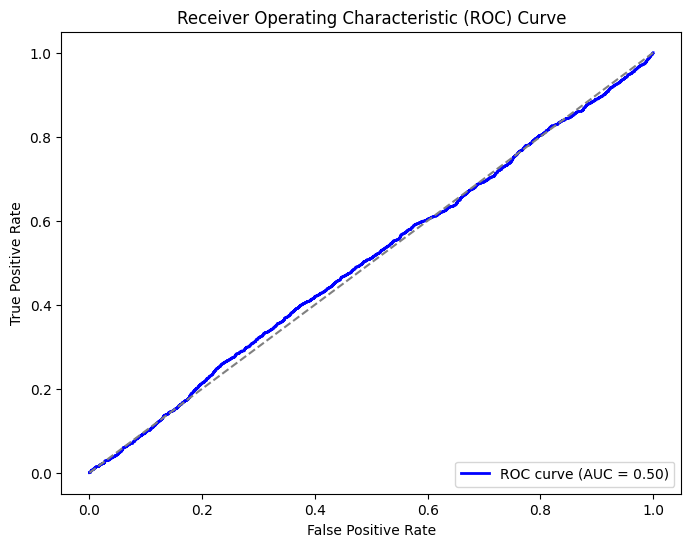

In [218]:
execute_model(SVC(kernel='linear', probability=True))